## Question 4 - Systolic Blood Pressure

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.formula.api import ols

exam=pd.read_csv('bloodpressure.txt', sep='\t',delimiter=r"\s+")
exam.head()

,Y,X1,X2
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196


### Fit models

In [2]:
model1=ols('Y~X1',exam).fit()
model2=ols('Y~X1+X2',exam).fit()
estimate1=model1.summary().tables[1]
estimate2=model2.summary().tables[1]
print('Output of Model 1')
print(estimate1)
print('Output of Model 2')
print(estimate2)

Output of Model 1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.7063      5.369     10.934      0.000      47.107      70.306
X1             1.4638      0.085     17.279      0.000       1.281       1.647
Output of Model 2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.7311      9.651      3.288      0.006      10.704      52.758
X1             0.9054      0.192      4.720      0.000       0.487       1.323
X2             0.3185      0.103      3.099      0.009       0.095       0.542


/Users/nhaswell/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/Users/nhaswell/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [3]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     298.6
Date:                Mon, 15 Feb 2021   Prob (F-statistic):           2.38e-10
Time:                        22:22:32   Log-Likelihood:                -34.777
No. Observations:                  15   AIC:                             73.55
Df Residuals:                      13   BIC:                             74.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.7063      5.369     10.934      0.0

/Users/nhaswell/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [4]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     252.9
Date:                Mon, 15 Feb 2021   Prob (F-statistic):           1.55e-10
Time:                        22:22:35   Log-Likelihood:                -30.368
No. Observations:                  15   AIC:                             66.74
Df Residuals:                      12   BIC:                             68.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.7311      9.651      3.288      0.0

### a) Write down the two fitted models and interpret the regression coefficients

Model1: Y = 58.7063 + 1.4638X1 + ϵ

Model2: Y = 31.7311 + 0.9054X1 + 0.3185X2 + ϵ

### b) Test whether β0=0 in the 2 models at a 0.05 significance level

In [5]:
print("Model1 tvalue ", model1.tvalues[0])
print("Model1 pvalue ", model1.pvalues[0])

Model1 tvalue  10.933615070161668
Model1 pvalue  6.327507980217847e-08


Model 1

The hypothesis therefore states:
H0: β0=0
H1: β0 ≠0

β0 in model 1 is statistically significant at α=0.05 therefore we reject the null hypothesis that β0 = 0


In [6]:
print("Model2 tvalue ", model2.tvalues[0])
print("Model2 pvalue ", model2.pvalues[0])


Model2 tvalue  3.2880082340088768
Model2 pvalue  0.006483197796659898


Model 2

The hypothesis therefore states:
H0: β0=0
H1: β0 ≠0

β0 in model 2 is statistically significant at α=0.05 therefore we reject the null hypothesis that β0 = 0


### c) Check the linearity assumption of Model 1

Linearity can be tested by plotting residuals vs. predictions, where residuals are prediction errors.

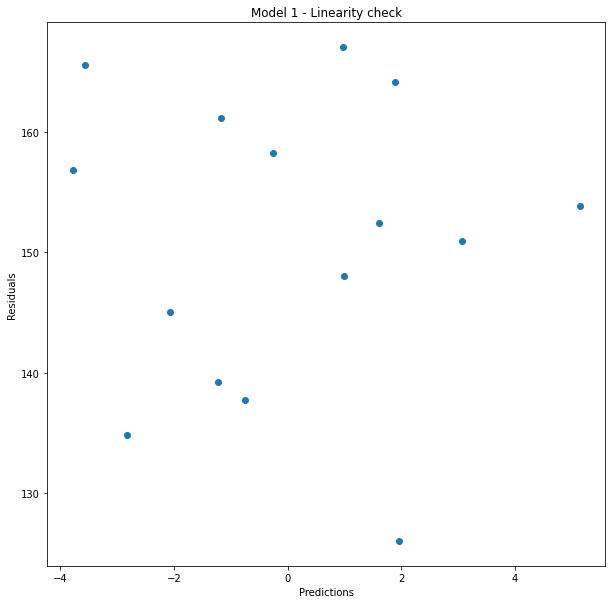

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.scatter(model1.resid, model1.predict())
ax.set_ylabel('Residuals')
ax.set_xlabel('Predictions')
ax.set_title('Model 1 - Linearity check')
plt.show()

It seems like the corresponding residual plot is reasonably random. 

### d) Test whether β1=β2=0 in Model 2 at a 0.05 significance level

In [8]:
from statsmodels.stats.anova import anova_lm
anova_lm(model1,model2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,13.0,90.663076,0.0,NaN,NaN,NaN
1,12.0,50.364117,1.0,40.298959,9.601826,0.009213


We can reject the hypothesis that β1=β2=0 in Model 2 as there is significant evidence at pvalue 0.009213.

### e) Which of the two models would you use to predict the systolic blood pressure for an individual who is 75 years old and 170 pounds weight? Why? What is your prediction in this case?

In [10]:
predict = model1.predict(pd.DataFrame({'X1' : [75], 'X2' : [170]}))[0]


Model 2 attempts to incorporate both X1 (Age) and X2 (Weight) giving more information that might be useful in predicting the systolic blood pressure. 

Upon fitting the model, we see that the coefficients for both X1 and X2 are significant at the 0.05 level, 
suggesting that it is helpful to know both X1 and X2 when trying to predict level of systolic blood pressure (Y). 

Also, model 2 has higher r-squared (0.9768220606621365) which is better than model 1 (R^2=0.9582761813724345).

In [11]:
print("Using model 2, we predict the systolic blood pressure for an individual who is 75 years old and 170 pounds weight as : {0:.1f}".format(predict))

Using model 2, we predict the systolic blood pressure for an individual who is 75 years old and 170 pounds weight as : 168.5


In [12]:
print('R squred in model1:', model1.rsquared)
print('R squred in model2:', model2.rsquared)

R squred in model1: 0.9582761813724345
R squred in model2: 0.9768220606621365


## Question 5 - Admission

In [13]:
admission=pd.read_csv('admission.txt', sep='\t',delimiter=r"\s+")
admission.head()

,admit,gre,gpa
0,0,380,3.61
1,1,660,3.67
2,1,800,4.00
3,1,640,3.19
4,0,520,2.93


### (a)	Fit a logistic regression connecting the probability of admission with GRE and GPA. Interpret the coefficients. 

In [14]:
import statsmodels.formula.api as smf

logit = smf.logit('admit~gre+gpa',admission).fit()
print(logit.summary())
# Plot the fit
x = np.arange(2, 850)
alpha = logit.params[0]
beta = logit.params[1]
y = np.exp(np.dot(beta, x) + alpha)/ (1.0 + np.exp(np.dot(beta, x) + alpha))


Optimization terminated successfully.
         Current function value: 0.312709
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                   20
Model:                          Logit   Df Residuals:                       17
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 Feb 2021   Pseudo R-squ.:                  0.5456
Time:                        22:26:15   Log-Likelihood:                -6.2542
converged:                       True   LL-Null:                       -13.763
Covariance Type:            nonrobust   LLR p-value:                 0.0005483
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.6420     13.462     -2.128      0.033     -55.027      -2.257
gre            0.0206      0.

### (b)	Calculate fitted probabilities for each observation under the logistic fitting. 

In [15]:
pred = logit.predict()
admission['prob'] = pred
admission

,admit,gre,gpa,prob
0,0,380,3.61,0.040602
1,1,660,3.67,0.947165
2,1,800,4.00,0.999376
3,1,640,3.19,0.531426
4,0,520,2.93,0.026258
5,1,760,3.00,0.840559
6,1,560,3.58,0.596378
7,0,400,3.08,0.004747
8,1,540,3.39,0.278757
9,0,520,3.92,0.774231


### (c)	If the fitted probability for an observation is greater than 0.5, we will assign it to the group which has Admit = 1; and if less than 0.5 we will classify it to the group which has Admit = 0. Find out the classification for each observation.

In [16]:
admission['pred']=[ 0 if x < 0.5 else 1 for x in pred]
admission

,admit,gre,gpa,prob,pred
0,0,380,3.61,0.040602,0
1,1,660,3.67,0.947165,1
2,1,800,4.00,0.999376,1
3,1,640,3.19,0.531426,1
4,0,520,2.93,0.026258,0
5,1,760,3.00,0.840559,1
6,1,560,3.58,0.596378,1
7,0,400,3.08,0.004747,0
8,1,540,3.39,0.278757,0
9,0,520,3.92,0.774231,1


### (d)	Determine what proportion of the data is classified correctly when using such a logistic regression. 

In [17]:
accuracy = 1-abs(admission['admit']-admission['pred']).sum()/logit.nobs
print('The overall correct classification is {0:.0f}%'.format(accuracy*100))
#print(accuracy*100)

The overall correct classification is 85%


### (e)	Is the logistic regression a good fitting?



Yes - it is relative good fitting as it correctly classified the dataset by 85%.

## Question 6 - Blood Pressure Research


In [18]:
#blood = model1.predict(pd.DataFrame({'med' : [75], 'X2' : [170]}))[0]


med = [9,10,12,13,15]
exercise = [0,2,3,6,8]
diet = [4,5,8,9,12]


SS_w1 = sum(i*i for i in med)  - ((sum(i for i in med)**2) / len(med))
SS_w2 = sum(i*i for i in exercise)  - ((sum(i for i in exercise)**2) / 
                                       len(exercise))
SS_w3 = sum(i*i for i in diet)  - ((sum(i for i in diet)**2) / len(diet))

SS_err = SS_w1 + SS_w2 + SS_w3

n = len(med) + len(exercise) + len(diet) # number of observations
k = 3 # number of groups
dfr = k-1
dfe = n-k
dft = dfr + dfe

# Sum squares between treatments:
# Mean of 3 groups: (𝑥_1 ) ̅=; (𝑥_2 ) ̅=; (𝑥_3 ) ̅=
med_xbar = sum(med) / len(med)
exercise_xbar = sum(exercise) / len(exercise)
diet_xbar = sum(diet) / len(diet)

# Mean of all patients/grand mean: 𝑥 ̅=
all_groups = (sum(med) + sum(exercise) + sum(diet)) / (len(med) + len(exercise) 
                                                          + len(diet))
#print("Mean of all patients ", all_groups)

#Sum squares of group 1 from the grand mean: 
# 𝑺𝑺_𝒃𝟏=𝟖×((𝑥_1 ) ̅−𝒙 ̅ )^𝟐=;
SS_b1 = len(med) * (med_xbar-all_groups)**2


#𝑺𝑺_𝒃𝟐=𝟗×((𝑥_2 ) ̅−𝒙 ̅ )^𝟐=; 
SS_b2 = len(exercise) * (exercise_xbar-all_groups)**2

# 𝑺𝑺_𝒃𝟑=𝟓×((𝑥_3 ) ̅−𝒙 ̅ )^𝟐=;
SS_b3 = len(diet) * (diet_xbar-all_groups)**2

#Total sum squares between treatments: 𝑺𝑺_𝑻𝒓𝒆𝒂𝒕𝒎𝒆𝒏𝒕𝒔=𝑺𝑺_𝒃𝟏+𝑺𝑺_𝒃𝟐+𝑺𝑺_𝒃𝟑=
SS_Treatments = SS_b1 + SS_b2 + SS_b3

print("SS between:", SS_Treatments)
print("SS within ", SS_err)
print("SS total ", SS_Treatments + SS_err)

ms_treatments = SS_Treatments/2
ms_err = SS_err/12
print("MS between ", ms_treatments)
print("MS within ", ms_err)
print("MS total ", (SS_Treatments + SS_err) / (dfr+dfe))



F = (SS_Treatments/2) / (SS_err/12)
print("F between ", F)

from scipy import stats
p = stats.f.sf(F, 2, 12)
print("p value between ", p)

print("DF between ", dfr)
print("DF within ", dfe)
print("DF total ", dfr+dfe)

print("Critical value ", stats.f.ppf(q=1-.05, dfn=dfr, dfd=dfe))

SS between: 160.13333333333338
SS within  104.79999999999994
SS total  264.93333333333334
MS between  80.06666666666669
MS within  8.733333333333329
MS total  18.923809523809524
F between  9.167938931297718
p value between  0.0038313168847996064
DF between  2
DF within  12
DF total  14
Critical value  3.8852938346523933


### (a)	Is there a difference in the techniques used to lower blood pressure, at a significance level α=0.05?

Critical value: 3.8853

Reject the H0. The test statistic is in the rejection region.

Therefore, there is enough evidence that there is a difference in the techniques used to lower blood pressure.

### b) Perform pairwise tests on the 3 groups to determine whether difference lies between each pair at a significance level α=0.05.

In [19]:
# Medication Group vs Exercise Group

t_statistic, pVal = stats.ttest_ind(med, exercise)
pVal
print(t_statistic)
print(pVal)
if pVal < 0.05:
    print("reject H0")
else:
    print("accept H0")

4.486177232736354
0.0020390437812708626
reject H0


In [20]:
# Medication Group vs Diet Group
t_statistic, pVal = stats.ttest_ind(med, diet)
pVal
print(t_statistic)
print(pVal)
if pVal < 0.05:
    print("reject H0")
else:
    print("accept H0")

2.34787137637478
0.046836629550836055
reject H0


In [21]:
# Exercise Group vs Diet Group
t_statistic, pVal = stats.ttest_ind(exercise, diet)
pVal
print(t_statistic)
print(pVal)
if pVal < 0.05:
    print("reject H0")
else:
    print("accept H0")

-1.87668623363422
0.0974006409682124
accept H0


### c) Comments on your answer to (a) and (b).


H0:μ1=μ2,ts=4.486177232736354  Reject  H0

H0:μ1=μ3,ts=2.34787137637478   Reject  H0

H0:μ2=μ3,ts=-1.87668623363422  Failed to reject  H0

There is a significant difference in medication group and exercise group, medication group and diet group.

However there is not enough evidence to suggest that there is a difference exercise group and diet group.